# Intégrale stochastique

$\textbf{Élève:}$ BLILET Hatim

$\textbf{Groupe de PC:}$ GR3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

$(a)$ Écrivons, par formule d'Itô-Doeblin differentielle appliquée sur la fonction $x\mapsto x^2$:
$$\text{d}(W_s^2)= 2W_s \text{d}W_s + \text{d}t$$
Soit, sous forme intégrale:
$$\int_0^T W_s \text{d}W_s = \dfrac{1}{2}\bigg(\int_{0}^T \text{d}(W_s)^2 - \int_{0}^T \text{d}t \bigg)$$
Ainsi, on s'attend à ce que:
$$\int_0^T W_s \text{d}W_s = \dfrac{W_T^2}{2}- \dfrac{T}{2}$$

In [2]:
## On reprend le code du TP2 pour la simulation de mouvements brownien
m = 10000
T=2
n = 1000
dt=T/n
R = np.random.normal(0, 1, (m, n))
W = np.zeros((m,n+1))
W[:,1:] =np.cumsum(R, axis=1)
W=np.sqrt(dt)*W
diff = W[: ,1:]-W[:,:-1]
I_n = np.sum(W[:, :-1] * diff, axis=1) 
J_n = np.sum(W[:, 1:] * diff, axis=1) 
K_n = np.sum((W[:, :-1] + W[:, 1:]) * diff/2, axis=1)
V_I = (W[:,-1].T)**2/2 - I_n
V_J = (W[:,-1].T)**2/2 - J_n
V_K = (W[:,-1].T)**2/2 - K_n

$(b)$ En utilisant les vecteurs précedents, on a:

In [3]:
print(f"Quantités relatives au vecteur V_I: Moyenne empirque  = {np.mean(V_I):.5f}, Variance Empirique = {np.var(V_I):.5f}")
print(f"Quantités relatives au vecteur V_J: Moyenne empirque  = {np.mean(V_J):.5f}, Variance Empirique = {np.var(V_J):.5f}")
print(f"Quantités relatives au vecteur V_K: Moyenne empirque  = {np.mean(V_K):.5f}, Variance Empirique = {np.var(V_K):.5f}")


Quantités relatives au vecteur V_I: Moyenne empirque  = 0.99964, Variance Empirique = 0.00202
Quantités relatives au vecteur V_J: Moyenne empirque  = -0.99964, Variance Empirique = 0.00202
Quantités relatives au vecteur V_K: Moyenne empirque  = 0.00000, Variance Empirique = 0.00000


Rapplons que:
$$\int_0^T W_s\text{d}W_s = \lim_{n\to +\infty} \underbrace{\sum_{k=0}^{n-1}W\bigg(\dfrac{T \cdot k}{n}\bigg)\cdot \bigg(W\bigg(\dfrac{T \cdot (k+1)}{n}\bigg) - W\bigg(\dfrac{T \cdot k}{n}\bigg)\bigg)}_{=I_n} $$
On s'attend alors à ce que:
$$W_T^2/2 - I_N \simeq \dfrac{T}2 \text{ (d'après }(a)), \text{ ce qui est bien cohérent avec notre cas de }T=2$$
Pour $J_n$, on remarque:
$$J_n - I_n = \text{QV}_n(T)\xrightarrow[n\to +\infty]{}\text{QV}(T) \equiv [W,W]_T = T$$
Soit, pour $N$ suffisament grand:
$$J_N \simeq I_N + T \text{ soit dans notre cas }\dfrac{W_T^2}{2} - J_N \simeq -\dfrac{T}{2}$$
Ce qui est vérifié numériquement, finalement:
$$K_n= \dfrac{I_n+J_n}{2} = I_n + \dfrac{J_n-I_n}{2} \simeq_{n\to +\infty} \dfrac{W_T^2}{2}- \dfrac{T}{2}+\dfrac{T}{2} = \dfrac{W_T^2}{2}$$
On a donc:
$$\dfrac{W_T^2}{2} - K_n\simeq 0$$
Tous ces résultats sont alors confirmées en simulation.

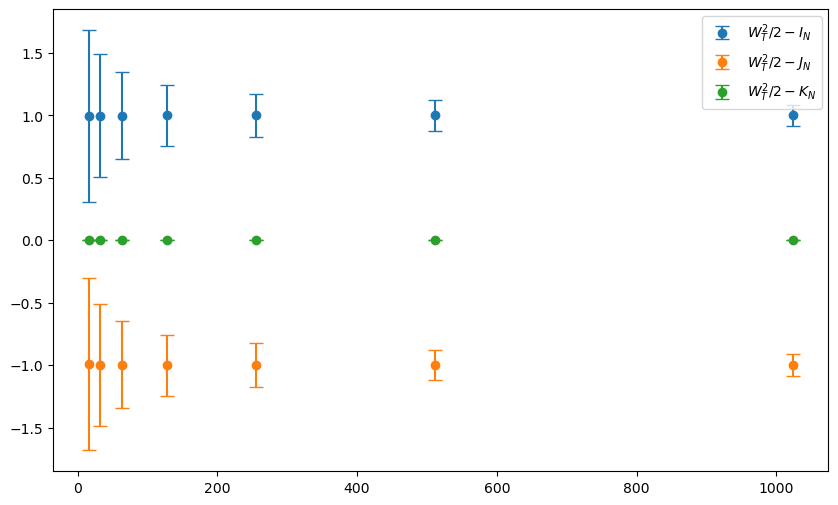

In [4]:
N_s = [2**k for k in range(4,11)]
V_I_s =[]
IC_V_I_s=[]
V_J_s =[]
IC_V_J_s=[]
V_K_s =[]
IC_V_K_s=[]
for n in N_s:
    m = 10000
    T=2
    dt=T/n
    R = np.random.normal(0, 1, (m, n))
    W = np.zeros((m,n+1))
    W[:,1:] =np.cumsum(R, axis=1)
    W=np.sqrt(dt)*W
    diff = W[: ,1:]-W[:,:-1]
    I_n = np.sum(W[:, :-1] * diff, axis=1) 
    J_n = np.sum(W[:, 1:] * diff, axis=1) 
    K_n = np.sum((W[:, :-1] + W[:, 1:]) * diff/2, axis=1)
    V_I = (W[:,-1].T)**2/2 - I_n
    V_J = (W[:,-1].T)**2/2 - J_n
    V_K = (W[:,-1].T)**2/2 - K_n
    V_I_s.append(np.mean(V_I))
    V_J_s.append(np.mean(V_J))
    V_K_s.append(np.mean(V_K))
    IC_V_I_s.append(1.96*np.std(V_I))
    IC_V_J_s.append(1.96*np.std(V_J))
    IC_V_K_s.append(1.96*np.std(V_K))
plt.figure(figsize=(10,6))
plt.errorbar(N_s, V_I_s, yerr = IC_V_I_s,fmt='o', capsize=5, label='$W_T^2/2-I_N$')
plt.errorbar(N_s, V_J_s, yerr = IC_V_J_s,fmt='o', capsize=5, label='$W_T^2/2-J_N$')
plt.errorbar(N_s, V_K_s, yerr = IC_V_K_s,fmt='o', capsize=5, label='$W_T^2/2-K_N$')
plt.legend()
plt.show()
    
    

## Question 1

$(a)$ Écrivons, par formule d'Itô-Doeblin differentielle appliquée sur la fonction $x\mapsto x^2$:
$$\text{d}(W_s^2)= 2W_s \text{d}W_s + \text{d}t$$
Soit, sous forme intégrale:
$$\int_0^T W_s \text{d}W_s = \dfrac{1}{2}\bigg(\int_{0}^T \text{d}(W_s)^2 - \int_{0}^T \text{d}t \bigg)$$
Ainsi, on s'attend à ce que:
$$\int_0^T W_s \text{d}W_s = \dfrac{W_T^2}{2}- \dfrac{T}{2}$$

In [5]:
## On reprend le code du TP2 pour la simulation de mouvements brownien
m = 10000
T=2
n = 1000
dt=T/n
R = np.random.normal(0, 1, (m, n))
W = np.zeros((m,n+1))
W[:,1:] =np.cumsum(R, axis=1)
W=np.sqrt(dt)*W
diff = W[: ,1:]-W[:,:-1]
I_n = np.sum(W[:, :-1] * diff, axis=1) 
J_n = np.sum(W[:, 1:] * diff, axis=1) 
K_n = np.sum((W[:, :-1] + W[:, 1:]) * diff/2, axis=1)
V_I = (W[:,-1].T)**2/2 - I_n
V_J = (W[:,-1].T)**2/2 - J_n
V_K = (W[:,-1].T)**2/2 - K_n

$(b)$ En utilisant les vecteurs précedents, on a:

In [6]:
print(f"Quantités relatives au vecteur V_I: Moyenne empirque  = {np.mean(V_I):.5f}, Variance Empirique = {np.var(V_I):.5f}")
print(f"Quantités relatives au vecteur V_J: Moyenne empirque  = {np.mean(V_J):.5f}, Variance Empirique = {np.var(V_J):.5f}")
print(f"Quantités relatives au vecteur V_K: Moyenne empirque  = {np.mean(V_K):.5f}, Variance Empirique = {np.var(V_K):.5f}")


Quantités relatives au vecteur V_I: Moyenne empirque  = 1.00000, Variance Empirique = 0.00199
Quantités relatives au vecteur V_J: Moyenne empirque  = -1.00000, Variance Empirique = 0.00199
Quantités relatives au vecteur V_K: Moyenne empirque  = 0.00000, Variance Empirique = 0.00000


Rappelons que:
$$\int_0^T W_s\text{d}W_s = \lim_{n\to +\infty} \underbrace{\sum_{k=0}^{n-1}W\bigg(\dfrac{T \cdot k}{n}\bigg)\cdot \bigg(W\bigg(\dfrac{T \cdot (k+1)}{n}\bigg) - W\bigg(\dfrac{T \cdot k}{n}\bigg)\bigg)}_{=I_n} $$
On s'attend alors à ce que:
$$W_T^2/2 - I_N \simeq \dfrac{T}2 \text{ (d'après }(a)), \text{ ce qui est bien cohérent avec notre cas de }T=2$$
Pour $J_n$, on remarque:
$$J_n - I_n = \text{QV}_n(T)\xrightarrow[n\to +\infty]{}\text{QV}(T) \equiv [W,W]_T = T$$
Soit, pour $N$ suffisament grand:
$$J_N \simeq I_N + T \text{ soit dans notre cas }\dfrac{W_T^2}{2} - J_N \simeq -\dfrac{T}{2}$$
Ce qui est vérifié numériquement, finalement:
$$K_n= \dfrac{I_n+J_n}{2} = I_n + \dfrac{J_n-I_n}{2} \simeq_{n\to +\infty} \dfrac{W_T^2}{2}- \dfrac{T}{2}+\dfrac{T}{2} = \dfrac{W_T^2}{2}$$
On a donc:
$$\dfrac{W_T^2}{2} - K_n\simeq 0$$
Tous ces résultats sont alors confirmées en simulation.

$Remarque:$ Toutes les convergences sont faites à trajectoire (aléa $\omega \in \Omega$) bien fixé. Les convergences ne sont donc pas stochastiques mais détérministes.

## Question 2

$(a)$ Cette fois, on essaie d'approximer:
$$\int_{0}^T \underbrace{e^s}_{\text{Déterministe}}\text{d}W_s = \lim_{n\to +\infty} \sum_{k=0}^n \underbrace{e^{Tk/n}\cdot \bigg(W\bigg(\dfrac{T \cdot (k+1)}{n}\bigg) - W\bigg(\dfrac{T \cdot k}{n}\bigg)\bigg)}_{\sim \mathcal{N}(0,T/n e^{2Tk/N})} \sim \mathcal{N}\bigg(0, \sum_{k=0}^N \dfrac{T}{n}e^{2Tk/n}\bigg)\xrightarrow[\mathcal{L}]{\text{Slutsky}} \mathcal{N}\bigg(0,\int_0^Te^{2s}\text{d}s\bigg)$$
On s'attend alors à ce que:
$$\int_0^Te^s\text{d}W_s\sim \mathcal{N}\bigg(0, \dfrac{e^{2T}-1}{2}\bigg)$$
Numériquement, pour $T=2$:
$$\dfrac{e^{2T}-1}{2}\simeq 27$$


In [7]:
m = 10000
T=2
print((np.exp(2*T)-1)/2)
n = 1000
dt=T/n
R = np.random.normal(0, 1, (m, n))
W = np.zeros((m,n+1))
W[:,1:] =np.cumsum(R, axis=1)
W=np.sqrt(dt)*W
diff = W[: ,1:]-W[:,:-1]
expos = np.exp(dt*np.arange(n+1))
A_n = np.sum(expos[:-1] * diff, axis=1) 
B_n = np.sum( expos[1:]* diff, axis=1) 
C_n = np.sum((expos[:-1]+expos[1:]) * diff/2, axis=1)

26.799075016572118


$(b)$ En utilisant les vecteurs précedents, on a:

In [8]:
print(f"Quantités relatives au vecteur A: Moyenne empirque  = {np.mean(A_n):.5f}, Variance Empirique = {np.var(A_n):.5f}")
print(f"Quantités relatives au vecteur B: Moyenne empirque  = {np.mean(B_n):.5f}, Variance Empirique = {np.var(B_n):.5f}")
print(f"Quantités relatives au vecteur C: Moyenne empirque  = {np.mean(C_n):.5f}, Variance Empirique = {np.var(C_n):.5f}")


Quantités relatives au vecteur A: Moyenne empirque  = -0.00511, Variance Empirique = 26.82364
Quantités relatives au vecteur B: Moyenne empirque  = -0.00512, Variance Empirique = 26.93115
Quantités relatives au vecteur C: Moyenne empirque  = -0.00512, Variance Empirique = 26.87737


Idem, on a:
$$A_n \xrightarrow[n\to +\infty]{}\int_0^T  e^s\text{d}W_s$$
Ainsi que, par inégalité des accroissements finis:
$$|A_n - B_n | \leq \sum_{k=1}^n |e^{t_i^n}- e^{t_{i-1}^n}| |W_{t_i^n} -W_{t_{i-1}^n}| \leq \sum_{k=1}^n ||\text{exp}||_{\infty, [0,T]}\cdot (t_{i}^n-t_{i-1}^n) \cdot |W_{t_i^n} -W_{t_{i-1}^n}| = ||\text{exp}||_{\infty, [0,T]}\max_{k\in [|1,n-1|]} |W_{t_i^n} -W_{t_{i-1}^n}| \xrightarrow[n\to +\infty]{}0 $$
La dernière convergence est conséquence de la continuité de $t\mapsto W_t$ à $\omega\in \Omega$ fixé sur le $\textbf{compact}$ $[0,T]$.
Ainsi, on s'attend à ce que:
$$B_n \xrightarrow[n\to +\infty]{}\int_0^T  e^s\text{d}W_s$$
Et finalement, $(C_n)$ converge aussi vers l'intégrale stochastique comme moyenne de $(A_n)$ et $(B_n)$ tous les deux convergeant vers $\int e^s\text{d}W_s$. Ainsi pour $n$ suffisament grand, les $(A_n^m) ,(B_n^m) \text{ et }(C_n^m)$ ont même propriétés statistiques que:
$$\int_0^Te^s\text{d}W_s\sim \mathcal{N}\bigg(0, \dfrac{e^{2T}-1}{2}\bigg)$$
Ce qui est confirmé experimentalement.

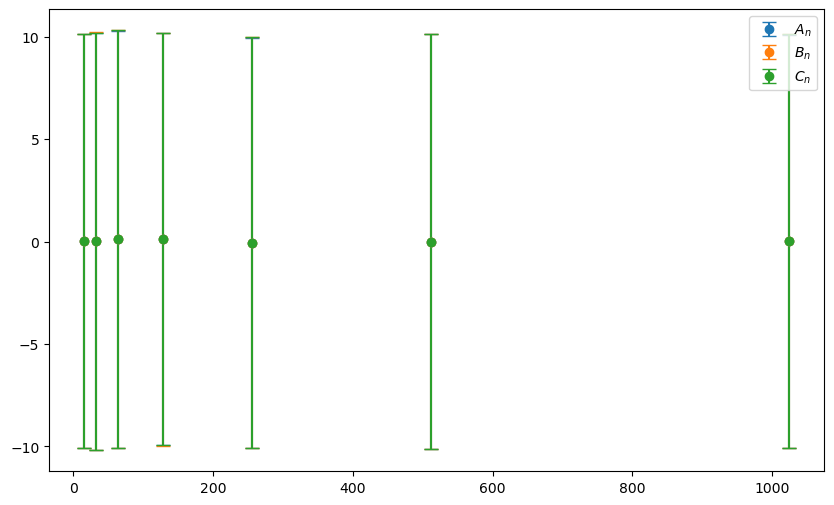

In [9]:
N_s = [2**k for k in range(4,11)]
V_A_s =[]
IC_V_A_s=[]
V_B_s =[]
IC_V_B_s=[]
V_C_s =[]
IC_V_C_s=[]
for n in N_s:
    m = 10000
    T=2
    n = 1000
    dt=T/n
    R = np.random.normal(0, 1, (m, n))
    W = np.zeros((m,n+1))
    W[:,1:] =np.cumsum(R, axis=1)
    W=np.sqrt(dt)*W
    diff = W[: ,1:]-W[:,:-1]
    expos = np.exp(dt*np.arange(n+1))
    A_n = np.sum(expos[:-1] * diff, axis=1) 
    B_n = np.sum( expos[1:]* diff, axis=1) 
    C_n = np.sum((expos[:-1]+expos[1:]) * diff/2, axis=1)
    V_A_s.append(np.mean(A_n))
    V_B_s.append(np.mean(B_n))
    V_C_s.append(np.mean(C_n))
    IC_V_A_s.append(1.96*np.std(A_n))
    IC_V_B_s.append(1.96*np.std(B_n))
    IC_V_C_s.append(1.96*np.std(C_n))
plt.figure(figsize=(10,6))
plt.errorbar(N_s, V_A_s, yerr = IC_V_A_s,fmt='o', capsize=5, label='$A_n$')
plt.errorbar(N_s, V_B_s, yerr = IC_V_B_s,fmt='o', capsize=5, label='$B_n$')
plt.errorbar(N_s, V_C_s, yerr = IC_V_C_s,fmt='o', capsize=5, label='$C_n$')
plt.legend()
plt.show()
    
    

## Question 3

$(a)$ On modifie les calculs des deux questions précedentes:

0.7875393003605885
0.7966676028357664
0.8079660901381538
0.7935830408733957
0.8113433807916137
0.8071911653983952
0.8149782329127384


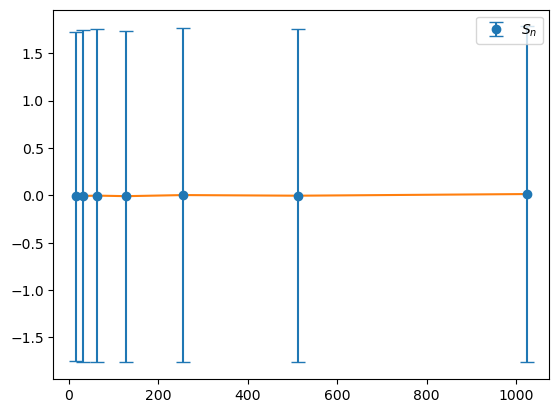

In [10]:
N_s = [2**k for k in range(4,11)]
S_n = []
IC_S_n=[]
for n in N_s:
    m = 10000
    T=2
    dt=T/n
    R = np.random.normal(0, 1, (m, n))
    W = np.zeros((m,n+1))
    W[:,1:] =np.cumsum(R, axis=1)
    W=np.sqrt(dt)*W
    sins = np.sin(W[:,:-1])
    curr_S = np.sum(sins,axis=1)/(2*n)+ np.sin(W[:,-1])
    print(np.var(curr_S))
    S_n.append(np.mean(curr_S))
    IC_S_n.append(1.96*np.std(curr_S))
plt.errorbar(N_s, S_n, yerr = IC_S_n,fmt='o', capsize=5, label='$S_n$')
plt.plot(N_s, S_n)
plt.legend()
plt.show()

$(b)$ Le graph de la question $(a)$ ressemble à celui de $\textbf{2.}c$, on peut alors conjecturer que:
$$ S_n \sim\mathcal{N}(0,V) \text{ avec }V\simeq 0.8$$
En effet par régularité de $(W_t)_{t\leq T}$ à trajectoire fixée (issue $\omega\in \Omega$ fixé), $(\sin(W_t))$ aussi et donc intégrable au sens de Riemann avec:
$$\lim_{n\to +\infty}S_n = \sin(W_T) +\dfrac{1}{2}\int_0^T\sin(W_t) \text{d}t$$
En esperance, en utilisant le fait que $\sin$ est fonction impaire, que pour $t\leq T$, $W_t\sim \mathcal{N}(0,t)$ et théorème de Fubini, on obtient:
$$\textbf{E}\bigg(\lim_{n\to +\infty}S_n  \bigg) = 0$$
La variance s'obtient par le calcul de $\textbf{E}((\lim_{n\to +\infty}S_n)^2)\simeq 0.71\cdots$ 

On peut montrer que $S_n - \sin(W_T)\xrightarrow[n\to +\infty]{L^2} 0$, donc $S_n$ se comporte comme le sinus d'une variable normale, elle n'est donc pas normale elle même.